In [1]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
# sns.set(font='SimHei', font_scale=2.5)
# plt.rcParams['axes.grid'] = True

import numpy as np
import pandas as pd

np.random.seed(0)

def show_image(filename, figsize=None, res_dir=False):
    if figsize:
        plt.figure(figsize=figsize)

    if res_dir:
        filename = './res/{}'.format(filename)

    plt.imshow(plt.imread(filename))

Chapter 2: Multi-armed Bandits
==============


### 2.1 A k-armed Bandit Problem

nonassociative, evaluative feedback problem:

reward = sample(P(action))
+ P(action) is a **stationary** probability distribution.
+ reward: $R$
+ $k$ different actions $a$.
+ goal: maximize the expected total reward over some time period.

The value $q$ of $a$ is the expected reward:

\begin{align}
    q(a) &= \mathbb{E} \left [ R_t \mid A_t = a \right ] \\
         &\approx \frac1{N} \sum_t^N R_t \mid A_t = a \quad \text{law of large numbers} \\
         &= Q_t(a)
\end{align}

### 2.2 Action-value Methods

one natural way to estimate the value of $a$ is by averaging the rewards actually received: (sample-average method)
\begin{equation}
    Q_t(a) = \frac{\sum_{i=1}^{t-1} R_i \cdot \mathbb{1}(A_i = a)}{\sum_{i=1}^{t-1} \cdot \mathbb{1}(A_i = a)}
\end{equation}

strategies:
+ greedy action: $A_t = \operatorname{argmax}_a Q_t(a)$
+ $\epsilon$-greedy actions:

\begin{equation}
    A_t =
    \begin{cases}
        \operatorname{argmax}_a Q_t(a) & \quad \text{ with probability 1 - $\epsilon$} \\
        \text{a random action} & \quad \text{ with probability $\epsilon$}
    \end{cases}
\end{equation}

##### Exercise
2.1:

$0.5 * 1 + 0.5 * 1/2 = 0.75$


2.2: 

+ definitely occur: steps = 2, 5
+ possiblly occur: steps= 1, 3, 4

### 2.3 The 10-armed Testbed

In [2]:
reward_funcs = [
    lambda size: np.random.normal(0.2, 1, size),
    lambda size: np.random.normal(-0.8, 1, size),
    lambda size: np.random.normal(1.5, 1, size),
    lambda size: np.random.normal(0.4, 1, size),
    lambda size: np.random.normal(1.2, 1, size),
    lambda size: np.random.normal(-1.3, 1, size),
    lambda size: np.random.normal(-0.2, 1, size),
    lambda size: np.random.normal(-1.0, 1, size),
    lambda size: np.random.normal(1.0, 1, size),
    lambda size: np.random.normal(-0.4, 1, size),
]

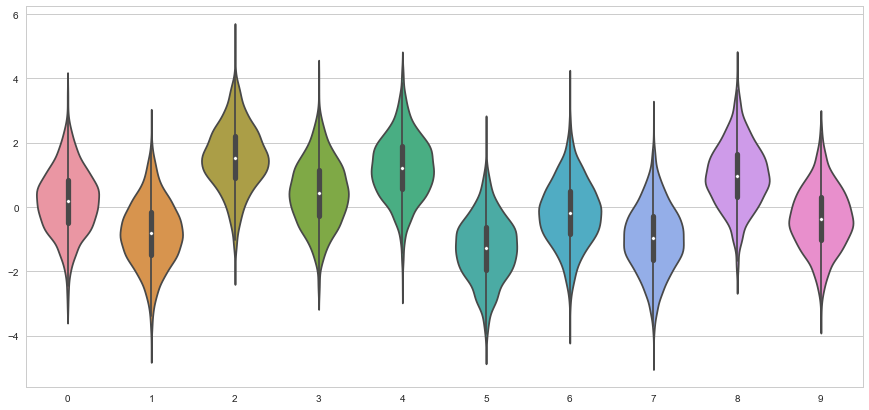

In [7]:
examples = pd.DataFrame([func(2000) for func in reward_funcs]).T
examples.index.name = "Reward distribution"
plt.figure(figsize=(15, 7))
sns.violinplot(data=examples)
del examples